In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import get_param_distance, param_line, lower_double_id, upper_double_id, separate, generate_all_lines, check_list
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters

top1 = pd.read_csv("Parameter_datasets/P1TBWnode1.csv", header = None)
topparams1 = convert_to_dict(top1)

top2 = pd.read_csv("Parameter_datasets/P1TBWnode2.csv", header = None)
topparams2 = convert_to_dict(top2)

top3 = pd.read_csv("Parameter_datasets/P1TBWnode3.csv", header = None)
topparams3 = convert_to_dict(top3)

top4 = pd.read_csv("Parameter_datasets/P1TBWnode4.csv", header = None)
topparams4 = convert_to_dict(top4)

top5 = pd.read_csv("Parameter_datasets/P1TBWnode5.csv", header = None)
topparams5 = convert_to_dict(top5)

top6 = pd.read_csv("Parameter_datasets/P1TBWnode6.csv", header = None)
topparams6 = convert_to_dict(top6)

top7 = pd.read_csv("Parameter_datasets/P1TBWnode7.csv", header = None)
topparams7 = convert_to_dict(top7)

top8 = pd.read_csv("Parameter_datasets/P1TBWnode8.csv", header = None)
topparams8 = convert_to_dict(top8)

top9 = pd.read_csv("Parameter_datasets/P1TBWnode9.csv", header = None)
topparams9 = convert_to_dict(top9)

top10 = pd.read_csv("Parameter_datasets/P1TBWnode10.csv", header = None)
topparams10 = convert_to_dict(top10)

top_params = [topparams1, topparams2, topparams3, topparams4, topparams6, topparams7, topparams8,
              topparams9, topparams10]

In [4]:
top_ICs = []
for i in range(10):
    top_ICs.append(ic_function("011", top_params[0]))#011 to avoid overshoot, and it is division point

In [5]:
top_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
top_sizes = []
for i in range(len(top_params)):
    if i == 4:
        pass
    else:
        param = top_params[i]
        theta = theta_from_param(param)
        for IC in top_ICs:
            sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,90,decays), [0,100], y0 = IC, method = 'BDF')
            output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
            top_lengths.append(len(output))
            top_sizes.append(upper_double_id(output))

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [6]:
#### observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90]
for i in range(len(endpts)-1):
    if i < 4:
        print('top_param', i, ':', top_lengths[endpts[i]:endpts[i+1]])
    else:
        print('top_param', i+1, ':', top_lengths[endpts[i]:endpts[i+1]])

top_param 0 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 1 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 2 : [8, 7, 7, 7, 8, 8, 7, 7, 8, 7]
top_param 3 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 5 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 6 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 7 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 8 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 9 : []


In [7]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90]
for i in range(len(endpts)-1):
    if i < 4:
        print('top_param', i, ':', top_sizes[endpts[i]:endpts[i+1]])
    else:
        print('top_param', i+1, ':', top_sizes[endpts[i]:endpts[i+1]])

top_param 0 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
top_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 5 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
top_param 6 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
top_param 7 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
top_param 8 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 9 : []


In [8]:
#removed param 5 (top_params[4]) for now
large, small = separate(top_params, '111')

In [9]:
line_list = generate_all_lines(small, large, 50)

In [10]:
%%time
check_list(line_list)#20 pairs to check

CPU times: user 4min 9s, sys: 3.09 s, total: 4min 12s
Wall time: 4min 49s


[True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True]

In [14]:
line = line_list[0]
sizes = []
#for the sake of easy ICs for first run
param = line[0]
sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = [param['thetaMnMc'], param['thetaPMn'], param['thetaMcP']], args = [param, n, decays], method = 'BDF')
#create sizes, list of lenghts in forward direction
for param in line:
    theta = theta_from_param(param)
    IC = [sol.y[0,-1],sol.y[1,-1],sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = IC, args = [param, n, decays], method = 'BDF')
    if param == line[29]:
        sol1 = sol
    if param == line[33]:
        sol2 = sol
    if param == line[34]:
        sol3 = sol
    if param == line[36]:
        sol4 = sol
    if param == line[37]:
        sol5 = sol
    if param == line[38]:
        sol6 = sol
    if param == line[39]:
        sol7 = sol
    output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
    size = upper_double_id(output)
    sizes.append(size)

In [17]:
rev_line = line.copy()
rev_line.reverse()
rev_sizes = []
#for the sake of easy ICs for first run
param = rev_line[0]
sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = [param['thetaMnMc'], param['thetaPMn'], param['thetaMcP']], args = [param, n, decays], method = 'BDF')
for param in rev_line:
    theta = theta_from_param(param)
    rev_IC = [sol.y[0,-1],sol.y[1,-1],sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = rev_IC, args = [param, n, decays], method = 'BDF')
    if param == line[29]:
        sol1b = sol
    if param == line[33]:
        sol2b = sol
    if param == line[34]:
        sol3b = sol
    if param == line[36]:
        sol4b = sol
    if param == line[37]:
        sol5b = sol
    if param == line[38]:
        sol6b = sol
    if param == line[39]:
        sol7b = sol
    output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
    size = upper_double_id(output)
    rev_sizes.append(size)
rev_rev_sizes = rev_sizes.copy()
rev_rev_sizes.reverse()

In [18]:
output1 = get_periodic_domains(sol1.y, theta_from_param(line[29]), num_periods_to_verify = 2)
output2 = get_periodic_domains(sol1b.y, theta_from_param(line[29]), num_periods_to_verify = 2)

In [19]:
upper_double_id(output1)

'Large'

In [20]:
upper_double_id(output2)

'Small'

In [13]:
for i in range(len(sizes)):
    print(i, sizes[i], rev_rev_sizes[i])

0 Large Large
1 Large Large
2 Large Large
3 Large Large
4 Large Large
5 Large Large
6 Large Large
7 Large Large
8 Large Large
9 Large Large
10 Large Large
11 Large Large
12 Large Large
13 Large Large
14 Large Large
15 Large Large
16 Large Large
17 Large Large
18 Large Large
19 Large Large
20 Large Large
21 Large Large
22 Large Large
23 Large Large
24 Large Large
25 Large Large
26 Large Large
27 Large Large
28 Large Large
29 Large Small
30 Large Large
31 Large Large
32 Large Large
33 Large Small
34 Large Small
35 Small Small
36 Small Large
37 Small Large
38 Small Large
39 Small Large
40 Small Small
41 Small Small
42 Small Small
43 Small Small
44 Small Small
45 Small Small
46 Small Small
47 Small Small
48 Small Small
49 Small Small


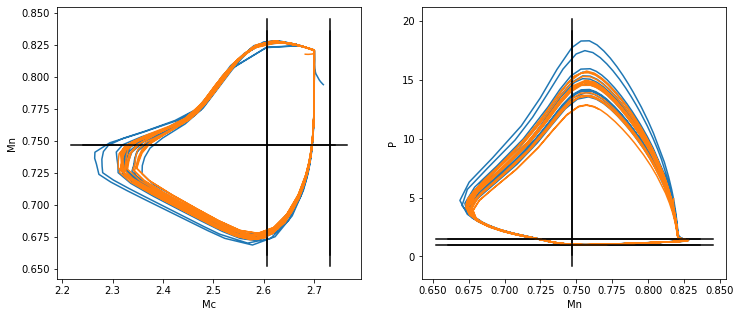

In [23]:
#plotting framework
# param = top_params[0]
# sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = top_ICs[0], method = 'BDF')
# sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = top_ICs[1], method = 'BDF')

param = line[29]
fig,(ax1,ax2) = plot_projections(sol1, param)
plot_projections(sol1b, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,5)

### PCA Stuff

In [21]:
#0 is small, 1 is large
top_param_colors = [0,1,1,1,1,0,0,0,1]

topdf1 = pd.DataFrame.from_dict(topparams1, orient = 'index')
topdf1 = topdf1.T
topdf2 = pd.DataFrame.from_dict(topparams2, orient = 'index')
topdf2 = topdf2.T
topdf3 = pd.DataFrame.from_dict(topparams3, orient = 'index')
topdf3 = topdf3.T
topdf4 = pd.DataFrame.from_dict(topparams4, orient = 'index')
topdf4 = topdf4.T
topdf6 = pd.DataFrame.from_dict(topparams6, orient = 'index')
topdf6 = topdf6.T
topdf7 = pd.DataFrame.from_dict(topparams7, orient = 'index')
topdf7 = topdf7.T
topdf8 = pd.DataFrame.from_dict(topparams8, orient = 'index')
topdf8 = topdf8.T
topdf9 = pd.DataFrame.from_dict(topparams9, orient = 'index')
topdf9 = topdf9.T
topdf10 = pd.DataFrame.from_dict(topparams10, orient = 'index')
topdf10 = topdf10.T

top_param_data = pd.concat([topdf1,topdf2,topdf3,topdf4,topdf6,topdf7,topdf8,topdf9,topdf10])

top_param_data['OrbitLength'] = top_param_colors

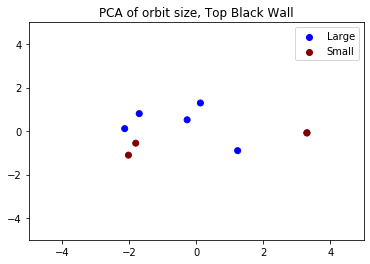

In [22]:
pca = PCA(n_components = 2)
pca.fit(top_param_data.iloc[:,0:17])
top_pca = pca.transform(top_param_data.iloc[:,0:17])

labels = top_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(top_pca[:,0],top_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, Top Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()